# **📌 Extracción(E - Extract)**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [409]:
df = pd.read_json('TelecomX_Data.json')
df.head()

FileNotFoundError: File TelecomX_Data.json does not exist

In [ ]:
cliente = pd.json_normalize(df['customer'])
telefono = pd.json_normalize(df['phone'])
internet = pd.json_normalize(df['internet'])
cuenta = pd.json_normalize(df['account'])
id_cliente = pd.concat([df['customerID'],df['Churn']],axis=1)

# **🔧 Transformación (T - Transform)**

## Transformación columna customer

In [ ]:
cliente.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   gender         7267 non-null   object
 1   SeniorCitizen  7267 non-null   int64 
 2   Partner        7267 non-null   object
 3   Dependents     7267 non-null   object
 4   tenure         7267 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 284.0+ KB


In [ ]:
cliente.head()

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3


In [ ]:
cliente['Partner'] = cliente['Partner'].map({'Yes': 1, 'No': 0})
cliente['Dependents'] = cliente['Dependents'].map({'Yes': 1, 'No': 0})

In [ ]:
cliente.head()

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,1,1,9
1,Male,0,0,0,9
2,Male,0,0,0,4
3,Male,1,1,0,13
4,Female,1,1,0,3


## Transformación columna phone

In [ ]:
telefono.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   PhoneService   7267 non-null   object
 1   MultipleLines  7267 non-null   object
dtypes: object(2)
memory usage: 113.7+ KB


In [ ]:
telefono.head()

,PhoneService,MultipleLines
0,Yes,No
1,Yes,Yes
2,Yes,No
3,Yes,No
4,Yes,No


In [ ]:
telefono['MultipleLines'].unique()

array(['No', 'Yes', 'No phone service'], dtype=object)

In [ ]:
columnas = ['PhoneService', 'MultipleLines']
telefono[columnas] = telefono[columnas].apply(lambda x: x.map({'Yes': 1, 'No': 0, 'No phone service': 0}))

In [ ]:
telefono.head()

,PhoneService,MultipleLines
0,1,0
1,1,1
2,1,0
3,1,0
4,1,0


## Transformación columna internet

In [ ]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   InternetService   7267 non-null   object
 1   OnlineSecurity    7267 non-null   object
 2   OnlineBackup      7267 non-null   object
 3   DeviceProtection  7267 non-null   object
 4   TechSupport       7267 non-null   object
 5   StreamingTV       7267 non-null   object
 6   StreamingMovies   7267 non-null   object
dtypes: object(7)
memory usage: 397.5+ KB


In [ ]:
internet.head()

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,No,Yes,No,Yes,Yes,No
1,DSL,No,No,No,No,No,Yes
2,Fiber optic,No,No,Yes,No,No,No
3,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,Fiber optic,No,No,No,Yes,Yes,No


In [ ]:
internet['StreamingMovies'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [ ]:
columnas = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
internet[columnas] = internet[columnas].apply(lambda x: x.map({'Yes': 1, 'No': 0, 'No internet service': 0}))

In [ ]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   InternetService   7267 non-null   object
 1   OnlineSecurity    7267 non-null   int64 
 2   OnlineBackup      7267 non-null   int64 
 3   DeviceProtection  7267 non-null   int64 
 4   TechSupport       7267 non-null   int64 
 5   StreamingTV       7267 non-null   int64 
 6   StreamingMovies   7267 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 397.5+ KB


In [ ]:
internet.head()

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,0,1,0,1,1,0
1,DSL,0,0,0,0,0,1
2,Fiber optic,0,0,1,0,0,0
3,Fiber optic,0,1,1,0,1,1
4,Fiber optic,0,0,0,1,1,0


## Transformación columna account

In [ ]:
cuenta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Contract          7267 non-null   object 
 1   PaperlessBilling  7267 non-null   object 
 2   PaymentMethod     7267 non-null   object 
 3   Charges.Monthly   7267 non-null   float64
 4   Charges.Total     7267 non-null   object 
dtypes: float64(1), object(4)
memory usage: 284.0+ KB


In [ ]:
cuenta.head()

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,Yes,Mailed check,65.6,593.3
1,Month-to-month,No,Mailed check,59.9,542.4
2,Month-to-month,Yes,Electronic check,73.9,280.85
3,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Month-to-month,Yes,Mailed check,83.9,267.4


In [ ]:
cantidad_vacios = cuenta['Charges.Total'].str.strip().eq('').sum()
cantidad_vacios

np.int64(11)

In [ ]:
cantidad_nan = cuenta['Charges.Total'].isna().sum()
cantidad_nan

np.int64(0)

In [ ]:
cuenta['Charges.Total'] = pd.to_numeric(
    cuenta['Charges.Total'].str.replace(r'[\$,]', '', regex=True),
    errors='coerce'
).fillna(0)

In [ ]:
cuenta['Charges.Total']

,Charges.Total
0,593.30
1,542.40
2,280.85
3,1237.85
4,267.40
...,...
7262,742.90
7263,1873.70
7264,92.75
7265,4627.65


In [ ]:
cuenta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Contract          7267 non-null   object 
 1   PaperlessBilling  7267 non-null   object 
 2   PaymentMethod     7267 non-null   object 
 3   Charges.Monthly   7267 non-null   float64
 4   Charges.Total     7267 non-null   float64
dtypes: float64(2), object(3)
memory usage: 284.0+ KB


In [ ]:
pd.unique(cuenta['Contract'])

array(['One year', 'Month-to-month', 'Two year'], dtype=object)

In [ ]:
pd.unique(cuenta['PaperlessBilling'])

array(['Yes', 'No'], dtype=object)

In [ ]:
cuenta['PaperlessBilling'] = pd.to_numeric(
    cuenta['PaperlessBilling'].replace({'Yes': 1, 'No': 0}),
    errors='coerce'
).fillna(0).astype(int)

<ipython-input-379-d3a536c0f724>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cuenta['PaperlessBilling'].replace({'Yes': 1, 'No': 0}),


In [ ]:
pd.unique(cuenta['PaymentMethod'])

array(['Mailed check', 'Electronic check', 'Credit card (automatic)',
       'Bank transfer (automatic)'], dtype=object)

In [ ]:
cuenta['Cuentas_Diarias'] = cuenta['Charges.Monthly'] / 30.44
cuenta['Cuentas_Diarias'] = cuenta['Cuentas_Diarias'].round(2)
cuenta

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,One year,1,Mailed check,65.60,593.30,2.16
1,Month-to-month,0,Mailed check,59.90,542.40,1.97
2,Month-to-month,1,Electronic check,73.90,280.85,2.43
3,Month-to-month,1,Electronic check,98.00,1237.85,3.22
4,Month-to-month,1,Mailed check,83.90,267.40,2.76
...,...,...,...,...,...,...
7262,One year,0,Mailed check,55.15,742.90,1.81
7263,Month-to-month,1,Electronic check,85.10,1873.70,2.80
7264,Month-to-month,1,Mailed check,50.30,92.75,1.65
7265,Two year,0,Mailed check,67.85,4627.65,2.23


## Transformación columna customer ID

In [ ]:
id_cliente.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
dtypes: object(2)
memory usage: 113.7+ KB


In [ ]:
id_cliente.head()

,customerID,Churn
0,0002-ORFBO,No
1,0003-MKNFE,No
2,0004-TLHLJ,Yes
3,0011-IGKFF,Yes
4,0013-EXCHZ,Yes


In [ ]:
cantidad_vacios = id_cliente['Churn'].str.strip().eq('').sum()
cantidad_vacios

np.int64(224)

In [ ]:
pd.unique(id_cliente['Churn'])

array(['No', 'Yes', ''], dtype=object)

In [ ]:
id_cliente['Churn'] = pd.to_numeric(
    id_cliente['Churn'].replace({'Yes': 1, 'No': 0}),
    errors='coerce'
).fillna(0).astype(int)

In [ ]:
id_cliente

,customerID,Churn
0,0002-ORFBO,0
1,0003-MKNFE,0
2,0004-TLHLJ,1
3,0011-IGKFF,1
4,0013-EXCHZ,1
...,...,...
7262,9987-LUTYD,0
7263,9992-RRAMN,1
7264,9992-UJOEL,0
7265,9993-LHIEB,0


# **📊 Carga y análisis(L - Load & Analysis)**

In [ ]:
df_analisis = pd.concat([id_cliente,cliente,telefono,internet,cuenta], axis=1)

In [ ]:
df_analisis.describe()

,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Charges.Monthly,Charges.Total,Cuentas_Diarias
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.257190,0.162653,0.484106,0.300124,32.346498,0.902711,0.421770,0.285950,0.344571,0.342782,0.289528,0.383927,0.387505,0.593230,64.720098,2277.182035,2.126155
std,0.437115,0.369074,0.499782,0.458343,24.571773,0.296371,0.493876,0.451897,0.475261,0.474672,0.453575,0.486374,0.487214,0.491265,30.129572,2268.648587,0.989744
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.600000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.425000,396.200000,1.160000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.300000,1389.200000,2.310000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.875000,3778.525000,2.950000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.900000


In [ ]:
df_analisis

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.60,593.30,2.16
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40,1.97
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85,2.43
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85,3.22
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40,2.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Female,0,0,0,13,1,0,DSL,...,0,1,0,0,One year,0,Mailed check,55.15,742.90,1.81
7263,9992-RRAMN,1,Male,0,1,0,22,1,1,Fiber optic,...,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.70,2.80
7264,9992-UJOEL,0,Male,0,0,0,2,1,0,DSL,...,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75,1.65
7265,9993-LHIEB,0,Male,0,1,1,67,1,0,DSL,...,1,1,0,1,Two year,0,Mailed check,67.85,4627.65,2.23


In [ ]:
print(df_analisis.columns)

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total',
       'Cuentas_Diarias'],
      dtype='object')


In [ ]:
df_analisis.to_csv('df_analisis.csv', index=False)

In [ ]:
contar_abandono = df_analisis['Churn'].value_counts()

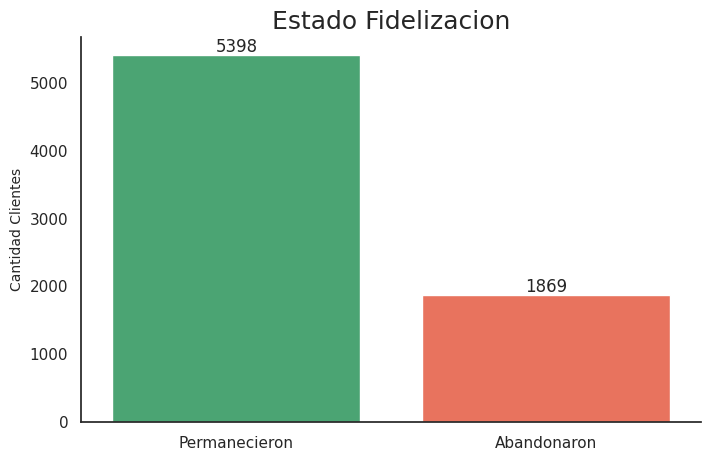

In [ ]:
sns.set(style="white")

plt.figure(figsize=(8, 5))

ax = sns.barplot(
    x=contar_abandono.index,
    y=contar_abandono.values,
    hue=contar_abandono.index,
    palette=[color1, color2],
    legend=False
)

plt.title('Estado Fidelizacion', fontsize=18)
plt.ylabel('Cantidad Clientes', fontsize=10)
plt.xlabel('')
plt.xticks([0, 1], ['Permanecieron', 'Abandonaron'])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

for i, count in enumerate(contar_abandono.values):
    plt.text(i, count + 50, str(count), ha='center', fontsize=12)

plt.show()


In [ ]:
hombres = df_analisis[df_analisis['gender'] == 'Male']['Churn'].value_counts()
mujeres = df_analisis[df_analisis['gender'] == 'Female']['Churn'].value_counts()

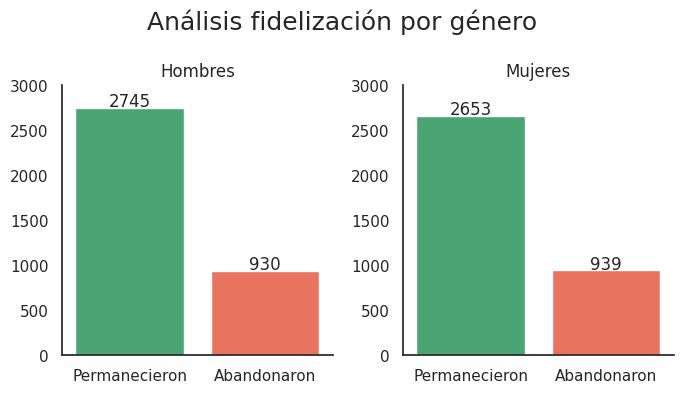

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 4))
plt.suptitle('Análisis fidelización por género', fontsize=18)

def abandono(data, ax, title):
    sns.barplot(
        x=data.index,
        y=data.values,
        hue=data.index,
        palette=[color1, color2],
        legend=False,
        ax=ax
    )

    ax.set_title(title)
    ax.set_xlabel('')
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['Permanecieron', 'Abandonaron'])
    ax.set_ylim(0, 3000)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    for i, count in enumerate(data.values):
        ax.text(i, count + 20, str(count), ha='center')

abandono(hombres, ax1, 'Hombres')
abandono(mujeres, ax2, 'Mujeres')

plt.tight_layout()
plt.show()


In [ ]:
adultos_mayores = df_analisis[df_analisis['SeniorCitizen'] == 0]['Churn'].value_counts()
adultos_jovenes = df_analisis[df_analisis['SeniorCitizen'] == 1]['Churn'].value_counts()

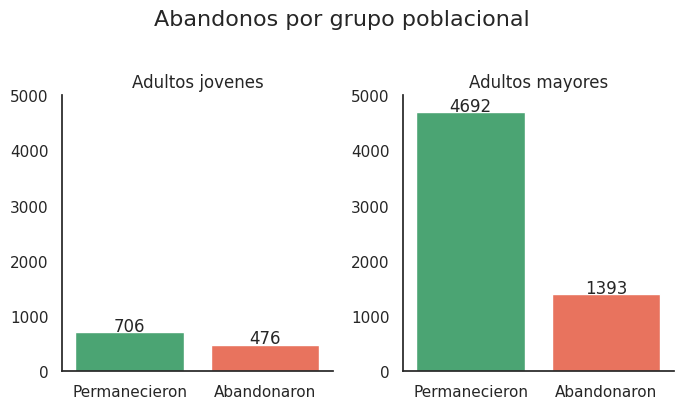

In [ ]:
sns.set(style="white")
fig, axs = plt.subplots(1, 2, figsize=(7, 4))
plt.suptitle('Abandonos por grupo poblacional', fontsize=16, y=1.02)

def abandono(data, ax, title):
    sns.barplot(
        x=data.index,
        y=data.values,
        hue=data.index,
        palette=[color1, color2],
        legend=False,
        ax=ax
    )
    ax.set_title(title)
    ax.set_xlabel('')
    ax.set_xticks([0,1])
    ax.set_xticklabels(['Permanecieron', 'Abandonaron'])
    ax.set_ylim(0, 5000)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    for i, count in enumerate(data.values):
        ax.text(i, count+20, str(count), ha='center')

abandono(adultos_jovenes, axs[0], 'Adultos jovenes')
abandono(adultos_mayores, axs[1], 'Adultos mayores')

plt.tight_layout()
plt.show()

In [ ]:
df_analisis['Contract'].unique()

array(['One year', 'Month-to-month', 'Two year'], dtype=object)

In [ ]:
a_1_año = df_analisis[df_analisis['Contract'] == 'One year']['Churn'].value_counts()
mes_a_mes = df_analisis[df_analisis['Contract'] == 'Month-to-month']['Churn'].value_counts()
a_2_años= df_analisis[df_analisis['Contract'] == 'Two year']['Churn'].value_counts()

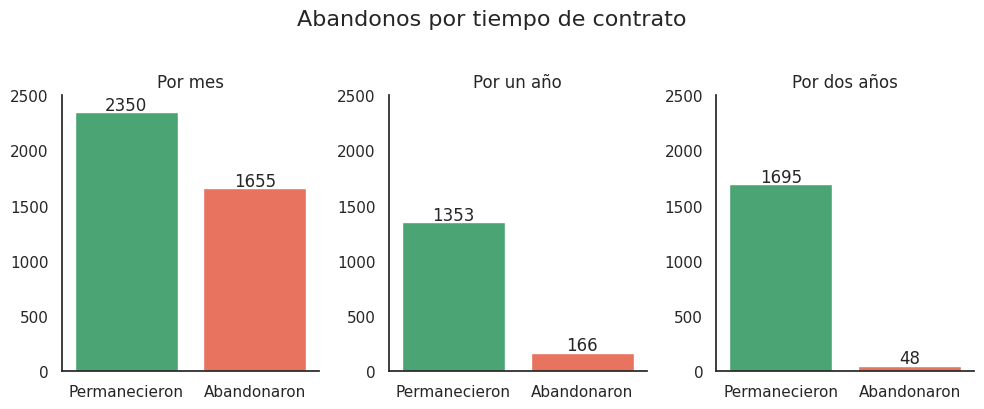

In [ ]:
sns.set(style="white")
fig, axs = plt.subplots(1, 3, figsize=(10, 4))
plt.suptitle('Abandonos por tiempo de contrato', fontsize=16, y=1.02)

def abandono(data, ax, title):
    sns.barplot(
        x=data.index,
        y=data.values,
        hue=data.index,
        palette=[color1, color2],
        legend=False,
        ax=ax
    )
    ax.set_title(title)
    ax.set_xlabel('')
    ax.set_xticks([0,1])
    ax.set_xticklabels(['Permanecieron', 'Abandonaron'])
    ax.set_ylim(0, 2500)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    for i, count in enumerate(data.values):
        ax.text(i, count+20, str(count), ha='center')

abandono(mes_a_mes, axs[0], 'Por mes')
abandono(a_1_año, axs[1], 'Por un año')
abandono(a_2_años, axs[2], 'Por dos años')

plt.tight_layout()
plt.show()

In [ ]:
df_analisis['PaymentMethod'].unique()

array(['Mailed check', 'Electronic check', 'Credit card (automatic)',
       'Bank transfer (automatic)'], dtype=object)

In [ ]:
cheque = df_analisis[df_analisis['PaymentMethod'] == pago_cheque]['Churn'].value_counts()
electronico  = df_analisis[df_analisis['PaymentMethod'] == pago_electronico]['Churn'].value_counts()
tarjeta_credito = df_analisis[df_analisis['PaymentMethod'] == pago_tarjeta_credito]['Churn'].value_counts()
transferencia = df_analisis[df_analisis['PaymentMethod'] == pago_transferencia]['Churn'].value_counts()

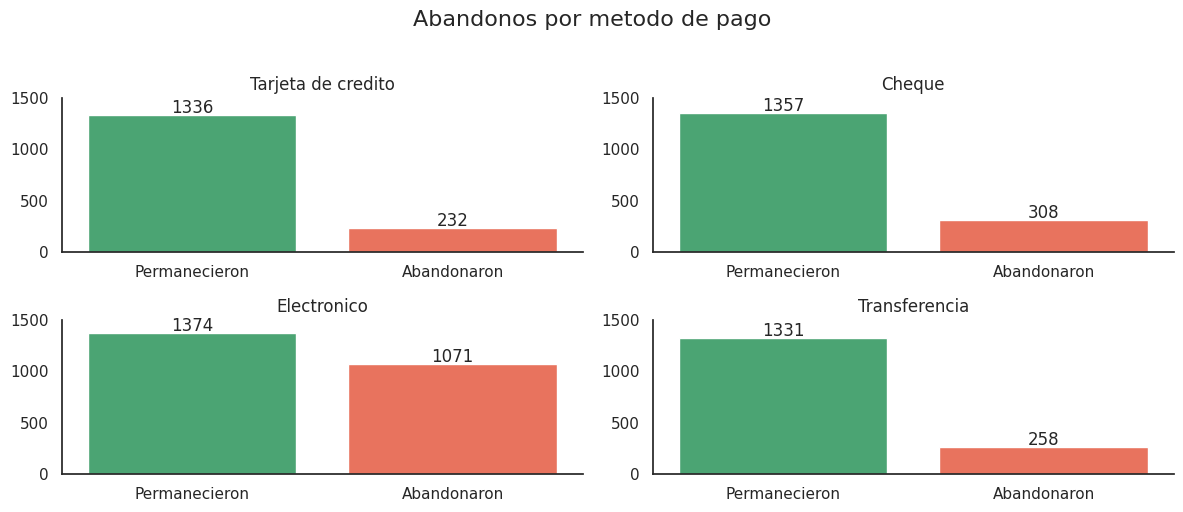

In [ ]:
sns.set(style="white")
fig, axs = plt.subplots(2, 2, figsize=(12, 5))
plt.suptitle('Abandonos por metodo de pago', fontsize=16, y=1.02)

def abandono(data, ax, title):
    sns.barplot(
        x=data.index,
        y=data.values,
        hue=data.index,
        palette=[color1, color2],
        legend=False,
        ax=ax
    )
    ax.set_title(title)
    ax.set_xlabel('')
    ax.set_xticks([0,1])
    ax.set_xticklabels(['Permanecieron', 'Abandonaron'])
    ax.set_ylim(0, 1500)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    for i, count in enumerate(data.values):
        ax.text(i, count+20, str(count), ha='center')

abandono(cheque, axs[0][1], 'Cheque')
abandono(electronico, axs[1][0], 'Electronico')
abandono(tarjeta_credito, axs[0][0], 'Tarjeta de credito')
abandono(transferencia, axs[1][1], 'Transferencia')


plt.tight_layout()
plt.show()

In [ ]:
TotalGastado1 = df_analisis[df_analisis['Churn'] == 1]['Charges.Total']
TotalGastado0 = df_analisis[df_analisis['Churn'] == 0]['Charges.Total']
tiempoDeContrato0 = df_analisis[df_analisis['Churn'] == 0]['tenure']
tiempoDeContrato1 = df_analisis[df_analisis['Churn'] == 1]['tenure']

In [ ]:
print("--- Total Gastado (Churn = 1) ---")
print(TotalGastado1.describe())
print("\n--- Total Gastado (Churn = 0) ---")
print(TotalGastado0.describe())

print("\n--- Tiempo de Contrato (Churn = 1) ---")
print(tiempoDeContrato1.describe())
print("\n--- Tiempo de Contrato (Churn = 0) ---")
print(tiempoDeContrato0.describe())

--- Total Gastado (Churn = 1) ---
count    1869.000000
mean     1531.796094
std      1890.822994
min        18.850000
25%       134.500000
50%       703.550000
75%      2331.300000
max      8684.800000
Name: Charges.Total, dtype: float64

--- Total Gastado (Churn = 0) ---
count    5398.000000
mean     2535.263977
std      2330.802193
min         0.000000
25%       564.362500
50%      1663.625000
75%      4237.275000
max      8672.450000
Name: Charges.Total, dtype: float64

--- Tiempo de Contrato (Churn = 1) ---
count    1869.000000
mean       17.979133
std        19.531123
min         1.000000
25%         2.000000
50%        10.000000
75%        29.000000
max        72.000000
Name: tenure, dtype: float64

--- Tiempo de Contrato (Churn = 0) ---
count    5398.000000
mean       37.321045
std        24.178367
min         0.000000
25%        14.000000
50%        37.000000
75%        61.000000
max        72.000000
Name: tenure, dtype: float64


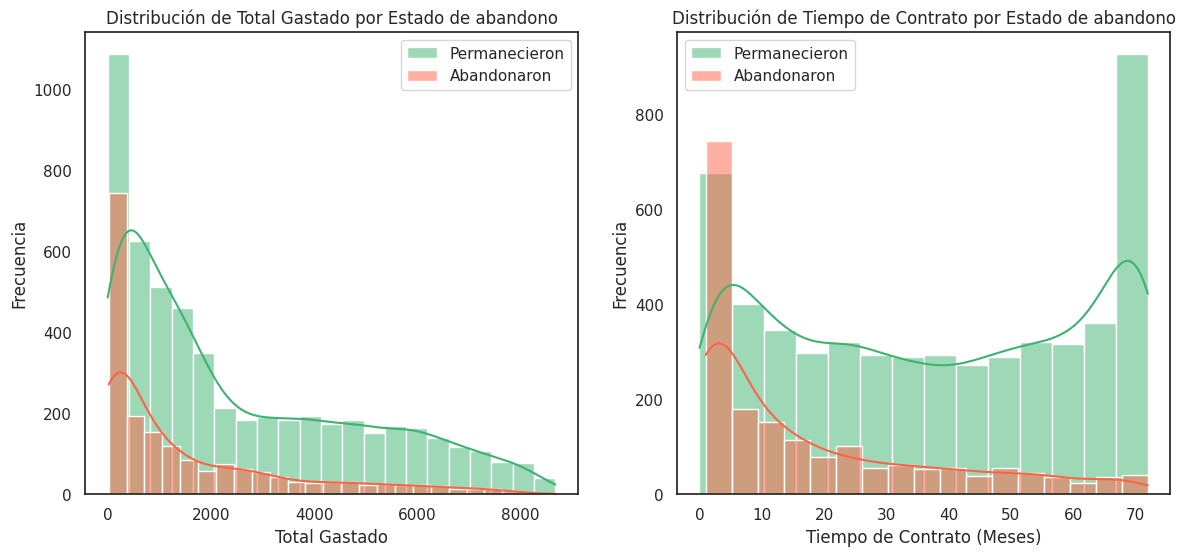

In [ ]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(TotalGastado0, color=color1, label='Permanecieron', kde=True)
sns.histplot(TotalGastado1, color=color2, label='Abandonaron', kde=True)
plt.title('Distribución de Total Gastado por Estado de abandono')
plt.xlabel('Total Gastado')
plt.ylabel('Frecuencia')
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(tiempoDeContrato0, color=color1, label='Permanecieron', kde=True)
sns.histplot(tiempoDeContrato1, color=color2, label='Abandonaron', kde=True)
plt.title('Distribución de Tiempo de Contrato por Estado de abandono')
plt.xlabel('Tiempo de Contrato (Meses)')
plt.ylabel('Frecuencia')
plt.legend()

plt.show()

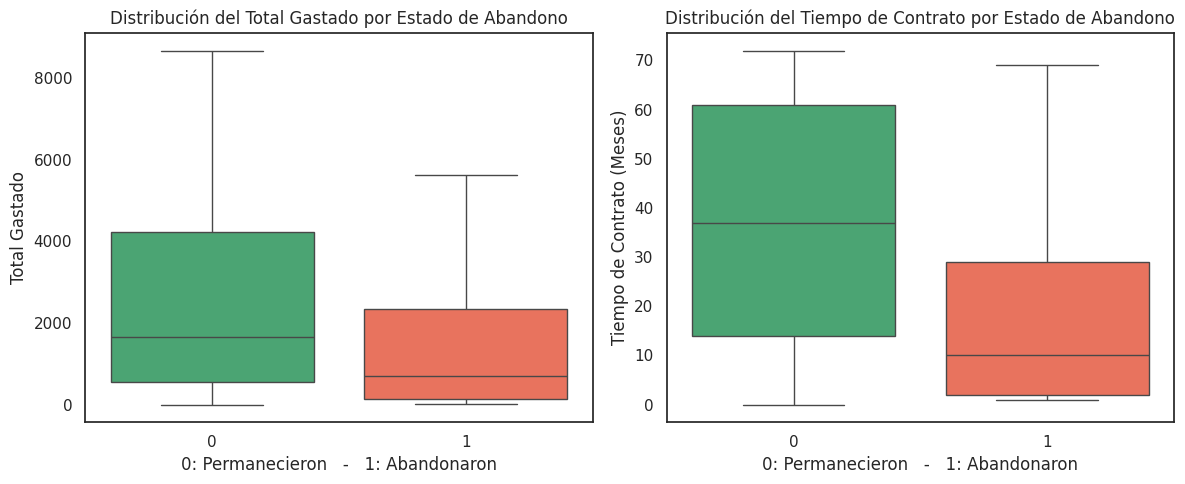

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(
    x='Churn',
    y='Charges.Total',
    hue='Churn',
    data=df_analisis,
    palette={0: color1, 1: color2},
    legend=False,
    showfliers=False
)
plt.title('Distribución del Total Gastado por Estado de Abandono')
plt.xlabel('0: Permanecieron   -   1: Abandonaron')
plt.ylabel('Total Gastado')

plt.subplot(1, 2, 2)
sns.boxplot(
    x='Churn',
    y='tenure',
    hue='Churn',
    data=df_analisis,
    palette={0: color1, 1: color2},
    legend=False,
    showfliers=False
)
plt.title('Distribución del Tiempo de Contrato por Estado de Abandono')
plt.xlabel('0: Permanecieron   -   1: Abandonaron')
plt.ylabel('Tiempo de Contrato (Meses)')

plt.tight_layout()
plt.show()


# **INFORME FINAL**

#**Análisis de Evasión de Clientes en Telecom X**
**Introducción**

Telecom X enfrenta un desafío crítico con una alta tasa de cancelación de clientes, lo que impacta negativamente en los ingresos y la rentabilidad. El proyecto "Abandono de Clientes" se ha iniciado para comprender a fondo los factores que contribuyen a esta pérdida de clientes. Este informe presenta los hallazgos clave del análisis exploratorio de datos (EDA) realizado para identificar patrones y tendencias en el comportamiento de los clientes y su relación con el abandono. El objetivo principal es proporcionar información valiosa que sirva de base para el desarrollo de modelos predictivos y estrategias de retención efectivas.
<br><br>
**Metodología**

El análisis se basó en un conjunto de datos proporcionado por Telecom X, que contiene información detallada sobre los clientes, sus características demográficas, los servicios contratados y los detalles de la cuenta. Se utilizó Python como lenguaje de programación, junto con las bibliotecas Pandas, NumPy, Matplotlib y Seaborn, para la manipulación, el procesamiento y la visualización de los datos.

Los pasos principales del análisis incluyeron:

Extracción de datos: Carga de los datos desde un archivo JSON.
Limpieza y transformación de datos: Conversión de datos anidados en columnas separadas y manejo de valores faltantes.
Análisis univariado: Examen de la distribución de cada variable individualmente.
Análisis bivariado: Exploración de las relaciones entre pares de variables, incluyendo la relación entre cada variable y la variable objetivo (Abandono).
Visualización de datos: Creación de gráficos y tablas para facilitar la interpretación de los resultados.
<br><br>
**Análisis Exploratorio de Datos (EDA) - Hallazgos Clave**
<br><br>
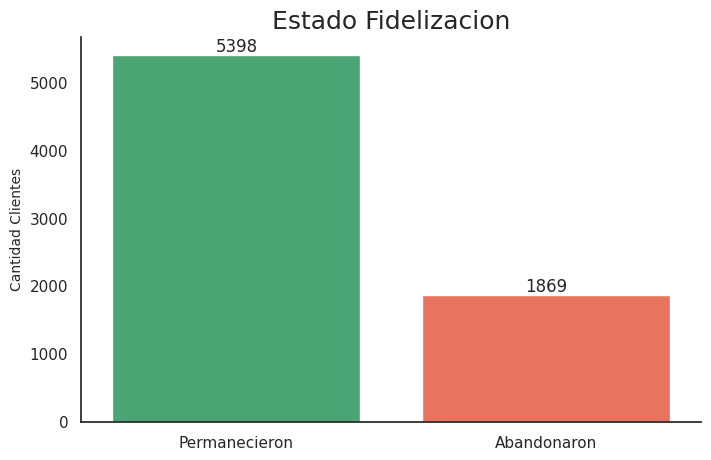

Se observó un desbalance en la variable objetivo, con una proporción significativa de clientes que permanecen en comparación con los que se van. Esto sugiere la necesidad de aplicar técnicas de muestreo o ponderación en el modelado predictivo para evitar sesgos.
<br><br>
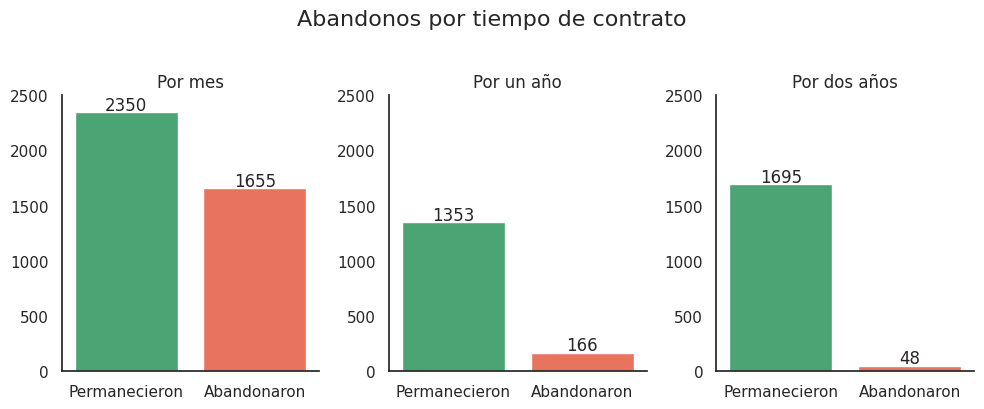

Los clientes con menor antigüedad (menor cantidad de meses de uso del servicio) muestran una tasa de abandono considerablemente más alta. A medida que aumenta la antigüedad, la tasa de abandono disminuye. Esto sugiere que la satisfacción y la lealtad del cliente pueden aumentar con el tiempo.
<br><br>
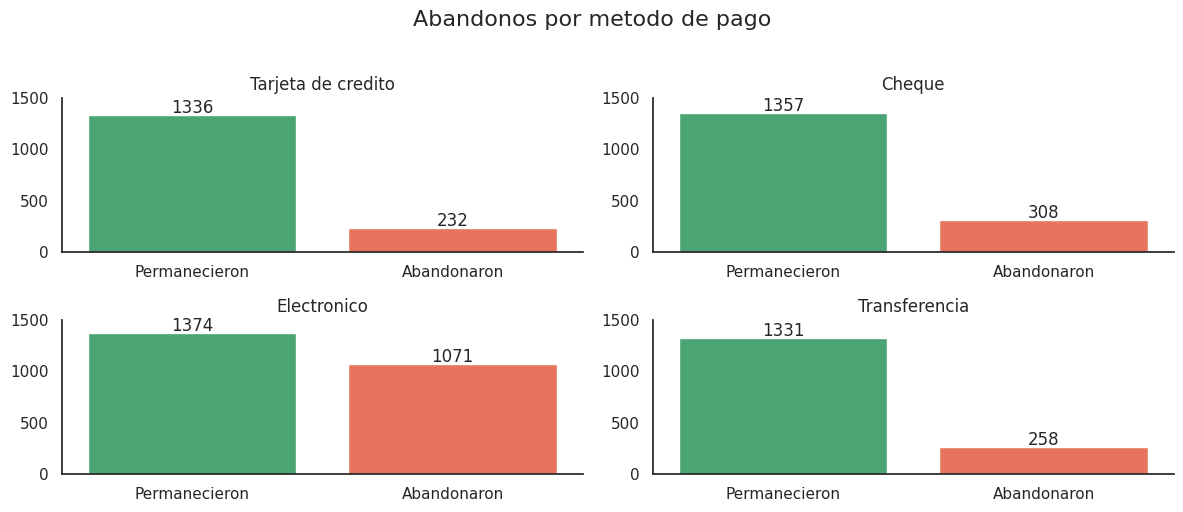

El método de pago electrónico está asociado a un mayor abandono.
<br><br>
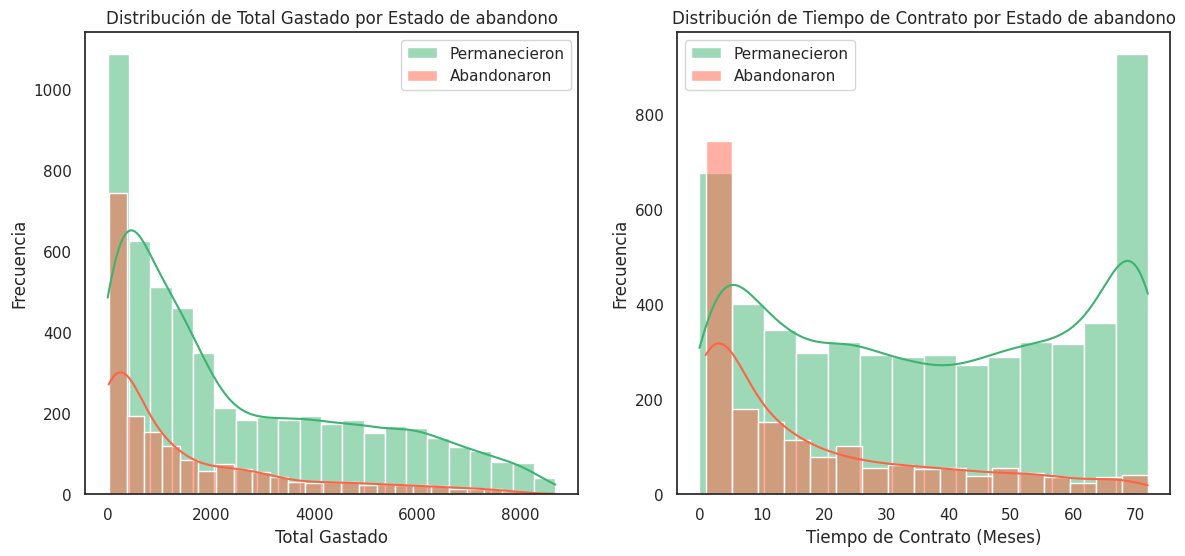

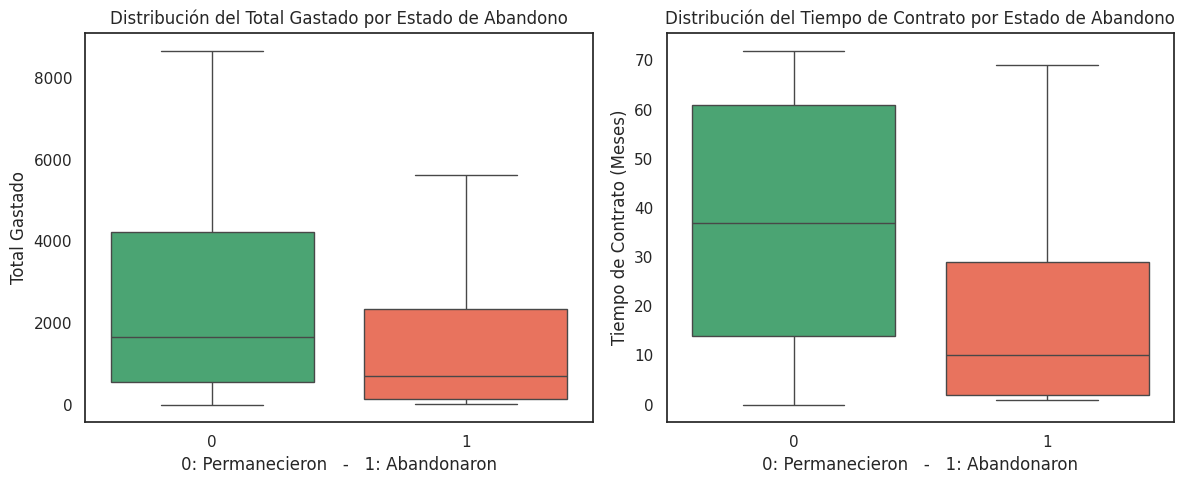
<br><br>
Los clientes con cargos totales más bajos tienden a tener una mayor probabilidad de abandono, lo cual se puede relacionar con que son clientes con menor tiempo de uso del servicio.
<br><br>
<br><br>
**Discusión e Interpretación**
<br><br>
El análisis revela varios factores que parecen estar asociados con la evasión de clientes en Telecom X. La antigüedad del cliente, los cargos mensuales, el tipo de contrato y el método de pago.
<br><br>
La alta tasa de abandono entre los clientes nuevos sugiere que puede haber problemas en el proceso de adquisición o en la experiencia inicial del cliente.
<br><br>
La sensibilidad al precio, evidenciada por la relación entre los cargos mensuales y el abandono, indica que la competitividad de los precios es crucial.
<br><br>
Las diferencias en el abandono según el tipo de contrato y el método de pago pueden reflejar la flexibilidad y conveniencia percibidas por los clientes.
<br><br>
<br><br>
**Conclusiones**
<br><br>
El análisis exploratorio de datos ha proporcionado información valiosa sobre los factores que influyen en la evasión de clientes en Telecom X. Los hallazgos sugieren que la empresa debe prestar especial atención a:
<br><br>
Retención de clientes nuevos: Implementar estrategias para mejorar la experiencia de los clientes en sus primeros meses.
<br><br>
Estrategias de precios: Revisar la estructura de precios y ofrecer opciones más competitivas o descuentos.
<br><br>
Flexibilidad de contratos: Ofrecer una mayor variedad de opciones de contrato que se adapten a las necesidades de los clientes.
<br><br>
Métodos de pago: Evaluar los métodos de pago disponibles y su impacto en la satisfacción del cliente.
<br><br>
<br><br>
**Próximos Pasos y Recomendaciones**
<br><br>
Modelado predictivo: Desarrollar modelos de machine learning para predecir la probabilidad de abandono de cada cliente y priorizar los esfuerzos de retención.
<br><br>
Segmentación de clientes: Identificar segmentos de clientes con características y comportamientos similares para personalizar las estrategias de retención.
<br><br>
Análisis de la causa raíz: Investigar más a fondo las razones detrás del abandono a través de encuestas, entrevistas o análisis de comentarios de los clientes.
<br><br>
Este informe proporciona una base sólida para que Telecom X tome decisiones informadas y desarrolle estrategias efectivas para reducir la evasión de clientes y mejorar la retención.